# Least squares and Discrete Fourier Series

This notebook solves a least square problem to find the n coefficients of a fourier series that best describes a function discretized in m points. This problem can be interpreted as finding the projection of an R^m vector (the discrete function) onto an R^n subspace, spanned by the n discrete fourier basis funtions. This is a form of performing 'space reduction' where a m-dimension (say 5000) function could be represented by its projection onto a subspace with a smaller dimension n (say 100).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
discreteComponents=10000 # The dimension of the original function
m=discreteComponents

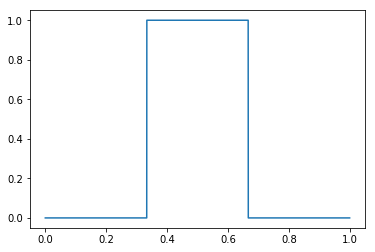

In [3]:
# The original function
xx = np.linspace(0, 1, m)
yy = np.zeros(m); yy[(xx>=1/3 )]=1; yy[(xx>2/3)]=0
plt.plot(xx,yy)

In [4]:
dimension = 500 # Number of Fourier basis discrete funtions
n = dimension

In [5]:
# Build the R^n Fourier basis discrete functions
def computeFourierBasis(m, n):
    x = np.linspace(-np.pi,np.pi,m)
    basisFunctions = [np.ones(m)]
    mult=1
    for i in range(1,n):
        if i%2==0:
            basisFunctions.append(np.sin(mult*x))
            mult+=1
        else:
            basisFunctions.append(np.cos(mult*x))
    A = np.column_stack(basisFunctions)
    return A

In [6]:
# The Fourier functions are known to form good bases, for being orthogonal to
# each other. The inner product approaches 0 as m tends to infinity
fourierBases=computeFourierBasis(m,n)
np.dot(fourierBases[:,1], fourierBases[:,2])

8.4522016122190458e-14

In [7]:
def projectOnFourierBasis(vec, n):
    m = vec.shape[0]
    A = computeFourierBasis(m,n)
    # Solves the least square problem to find the projection of the original function onto the R^n
    # space spanned by the n Fourier basis discrete functions
    x_h = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,yy))
    # Gets the coordinates in respect to the standard R^m basis, which will be our 'aproximated' or
    # 'space reduced' function
    p = np.dot(A,x_h)
    return p

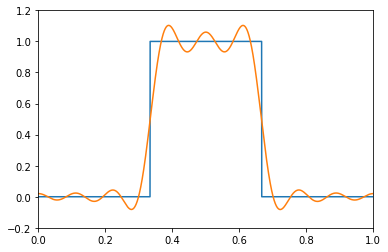

10.5779930492


In [8]:
# Compares the original R^m discrete function and the R^n projection on the discrete Fourier
# basis
from ipywidgets import interact
def plotOriginalFunctionAndProjection(x):
    pp = projectOnFourierBasis(yy,x)
    fig, ax = plt.subplots()
    plt.plot(xx,yy)
    plt.plot(xx,pp)
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([-0.2,1.2])
    plt.show()
    e = yy-pp
    print(np.sqrt(np.dot(e,e)))
interact(plotOriginalFunctionAndProjection,x=(2,300,2))